In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/framingham.csv")
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

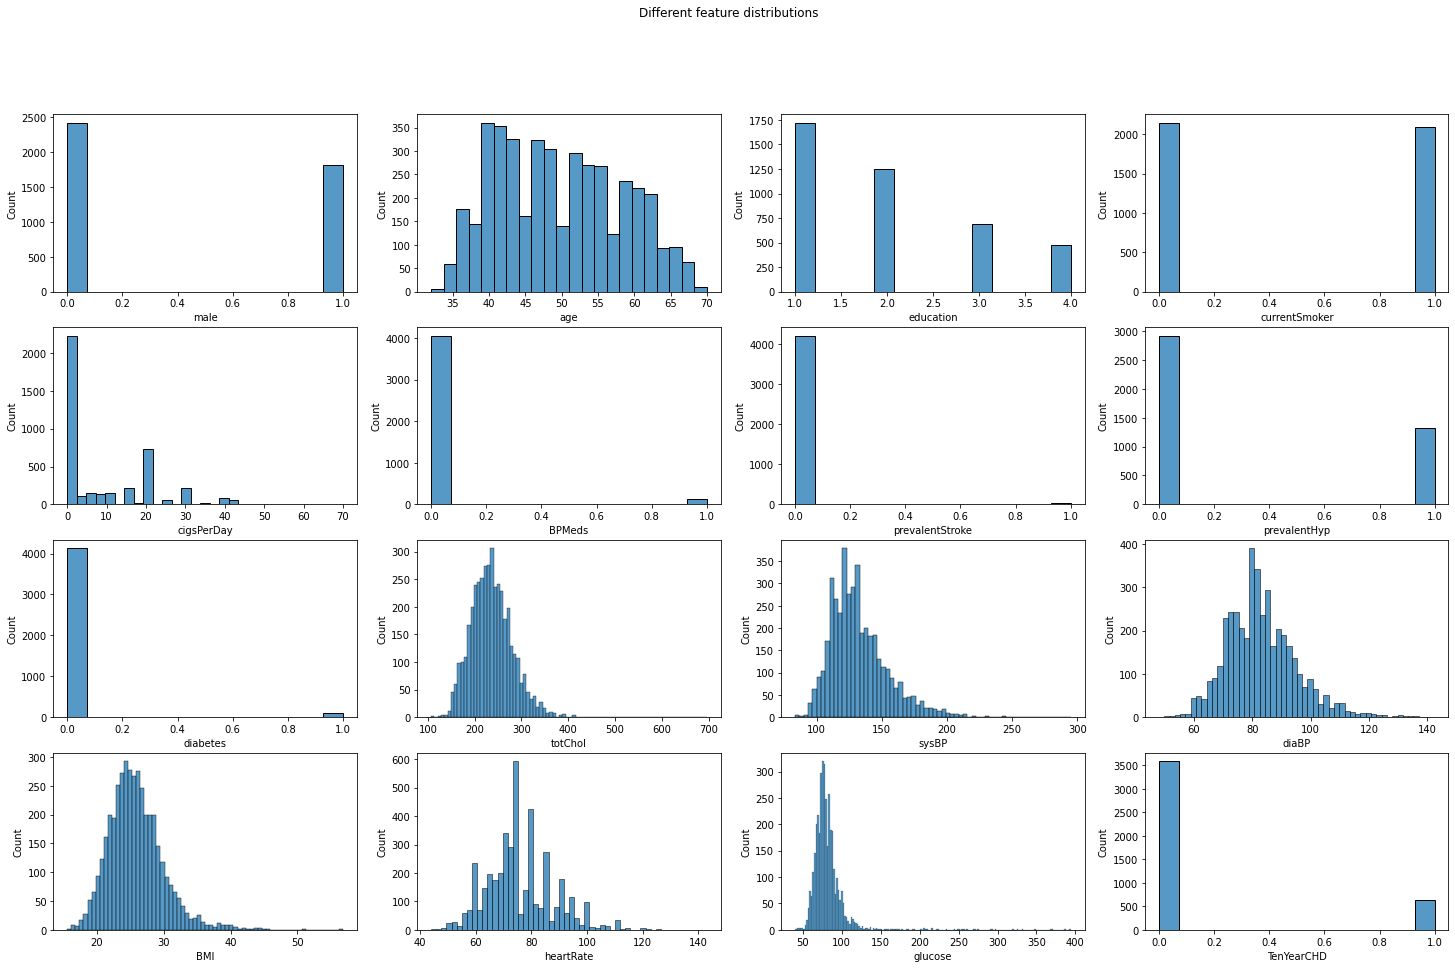

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(25, 15))
fig.suptitle('Different feature distributions')

axes = axes.reshape(16,)

for i,column in enumerate(df.columns):
    sns.histplot(ax = axes[i],data = df, x= column)

In [ ]:
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [ ]:
print(df.columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.size

67808

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.skew()

male                0.286135
age                 0.228146
education           0.690033
currentSmoker       0.023606
cigsPerDay          1.247910
BPMeds              5.550010
prevalentStroke    12.909062
prevalentHyp        0.819278
diabetes            5.994378
totChol             0.871422
sysBP               1.145362
diaBP               0.714102
BMI                 0.981974
heartRate           0.644482
glucose             6.213402
TenYearCHD          1.939741
dtype: float64

skewness: asymmetry of the probability distribution of a real-valued random variable about its mean. Here all of them is negative skew that indicates that the tail is on the left side of the distribution,

In [ ]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


Heatmap

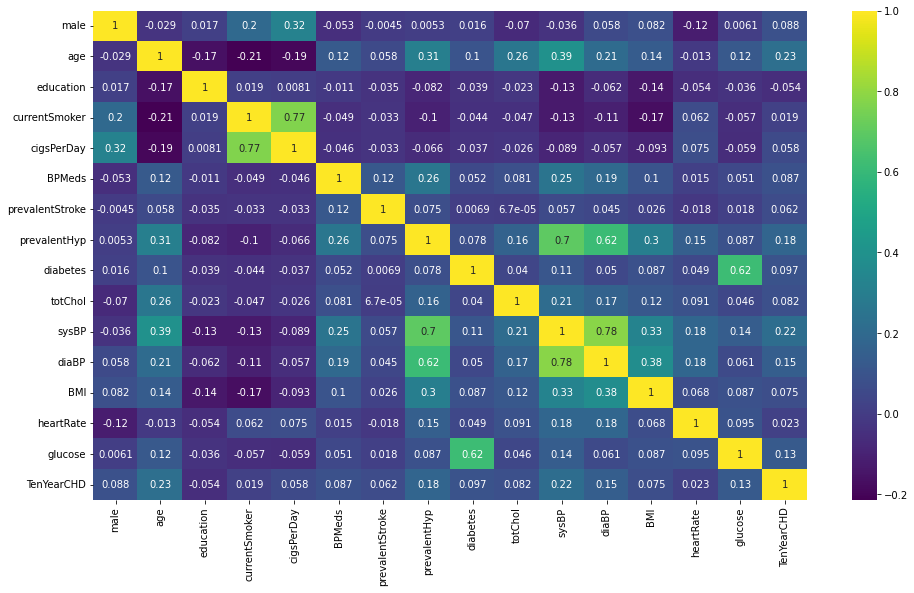

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

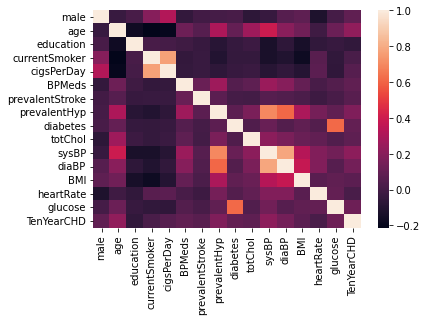

In [ ]:
sns.heatmap(df.corr(), fmt=".1g")

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Getting the Mutual Information about the data
X_mutual = df.astype("int64").reset_index().copy()
y_mutual = X_mutual.pop("TenYearCHD")

del X_mutual["index"]

# All discrete features should now have integer dtypes
discrete_features = X_mutual.dtypes == int

In [ ]:
# Make a function
def make_mi_scores(X_mutual, y_mutual, discrete_features):
    mi_scores = mutual_info_regression(X_mutual, y_mutual, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mutual, y_mutual, discrete_features)
mi_scores.to_frame().T

,prevalentHyp,totChol,diaBP,cigsPerDay,age,education,sysBP,BPMeds,heartRate,currentSmoker,male,glucose,prevalentStroke,diabetes,BMI
MI Scores,0.025279,0.02284,0.022602,0.022343,0.021359,0.014763,0.009644,0.00936,0.004322,0.003602,0.003489,0.001142,0.000431,0.000414,0.0


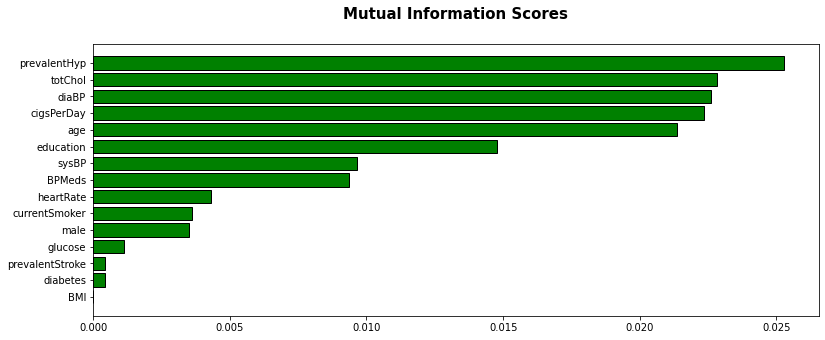

In [ ]:
def plot_mi_scores(scores):
    # variables
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    # plotting
    plt.figure(figsize=(13, 5))
    plt.barh(width, scores, color="g", edgecolor="k")
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores",
              weight="bold",
              fontsize=15,
              pad=25)

plot_mi_scores(mi_scores);

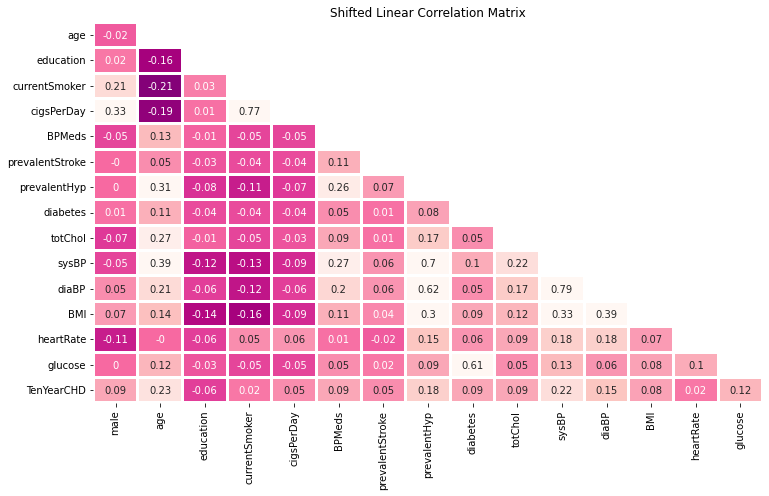

In [ ]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

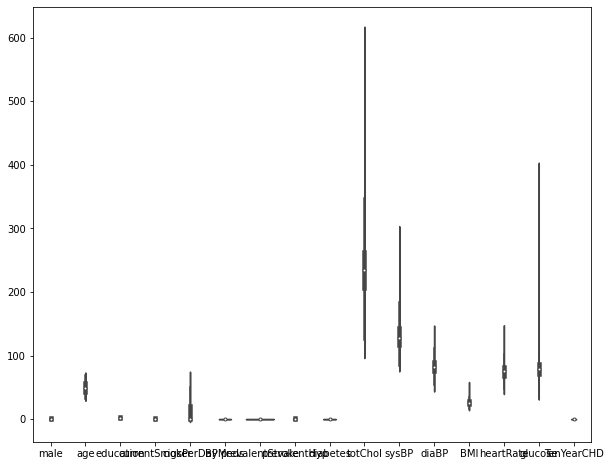

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df)
plt.show()

In [ ]:
sns.pairplot(
    df,
    hue='TenYearCHD', 
    kind='scatter',
    diag_kind='kde')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def information_value(var, target, bins=20):
    temp_df=None
    if var.dtype == np.float64:
        temp_df = (pd.crosstab(
              pd.qcut(var, 10, duplicates='drop'),
                target, normalize='columns')
              .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
              .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0])))
              .filter(['iv'])
              .iloc[0][0])
    else:
        temp_df = (pd.crosstab(var, target, normalize='columns')
              .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
              .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0])))
              .filter(['iv'])
              .iloc[0][0])
    
    return temp_df

In [ ]:
iv_dict = {'Variable':[], 'Information Value':[]}
for col in df.drop('TenYearCHD', axis=1).columns:
    iv = information_value(df[col], df['TenYearCHD'])
    iv_dict['Variable'].append(col)
    iv_dict['Information Value'].append(iv)
    
iv_df = pd.DataFrame(iv_dict).sort_values(by='Information Value', ascending=False).reset_index(drop=True)
iv_df

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,Information Value
0,age,inf
1,sysBP,0.336436
2,prevalentHyp,0.235012
3,diaBP,0.195513
4,totChol,0.078260
5,male,0.064738
6,BMI,0.064524
7,diabetes,0.048798
8,glucose,0.048037
9,cigsPerDay,0.025140
